## HSI Tutorial (Part 1: HSI metric)

Elchin Jafarov 
8/2018

## 1.HSI Metric
Description of the framework used for the Habitat Suitability Index (HSI) calculation. The HVI is combination (average) of multiple scores. To calculte a score we use Gaussian Distribution (GSD) function with zero mean. The score is a distance from 0 mean. For example, the score for x0 is equal to GSD(x0). 

In [1]:
import numpy as np
import hsiscore_class as HSI
import matplotlib.pyplot as plt
%matplotlib inline
hsi=HSI.hsi_score()

In [2]:
hsi.x0=3.0
hsi.sigma = 2.0
score = hsi.norm_gaussian()
print round(score,3)

0.325


1.Here we demonstrate how functions from hviscore.py are used in LLM model. The 'norm_gaussian' function mean nomalized gaussian and defines the score metric. For example, we want to calculate score for x0=0.1, and 1 with standard deviation sigma=0.5.

In [3]:
hsi.x0=0.1  # current value
hsi.sigma=.5 # standard deviation
score=hsi.norm_gaussian()
print 'score(',hsi.x0,')=',round(score,3)
hsi.x0=1
score=hsi.norm_gaussian()
print 'score(',hsi.x0,')=',round(score,3)
hsi.x0=-0.5
score=hsi.norm_gaussian()
print 'score(',hsi.x0,')=',round(score,3)

score( 0.1 )= 0.98
score( 1 )= 0.135
score( -0.5 )= 0.607


In [4]:
hsi.sigma=2.0 # standard deviation
x=np.linspace(-50,50,1000)
hsi.x0=x
dist=np.zeros(len(x))
dist=hsi.norm_gaussian()
print hsi.sigma

2.0


Below we visualize where on the probability distribution curve our scores lie, each score is a cross-section of the red line with GSD function.

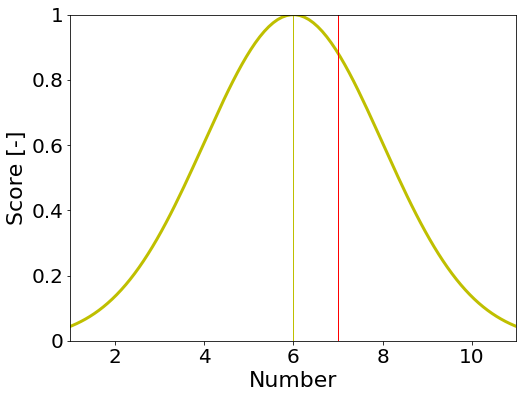

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x, dist, linewidth=3, color='y')
plt.plot(np.zeros(10), np.linspace(0,1,10), linewidth=1, color='y')
plt.plot(np.ones(10), np.linspace(0,1,10), linewidth=1, color='r')
plt.xlim(-5,5);plt.ylim(0,1);
plt.xlabel('Number',fontsize=22)
plt.ylabel('Score [-]',fontsize=22)

xnames = range(0,14,2)
ax.set_xticklabels(xnames, fontsize=20);
ynames = [0,0.2,0.4,0.6,0.8,1]
ax.set_yticklabels(ynames, fontsize=20);

The score value can be improved by incresing variance (sigma).

2.This all makes sense for mean=0. From now on we are going to call mean a benchmarking number. In general, the mean can be any number. The 'gscore' function is designed to deal with that, by using 'norm_gaussian' function. For example, we want to know how close a number (say 8) to a benchmarking number (say 10). Here we calculte the distance by using Gaussian distribution shown above. We introduce an additional parameter called 'smooth'. 'Smooth' relaxes the distance criteria. For example, smooth=0 uses default gaussian distribution. smooth=1 means that high score will hold even when we near the +/- 1 range around the benchmarking number.  

score( 0.1 )= 0.999
score( 1 )= 0.882
score( -0.5 )= 0.969


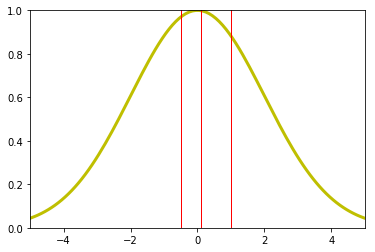

In [6]:
hsi.sigma=2.0 # 
score=hsi.norm_gaussian()
#update the distribution with new sigma
dist=hsi.norm_gaussian()
plt.plot(x, dist, linewidth=3, color='y')
plt.plot(0.1*np.ones(10), np.linspace(0,1,10), linewidth=1, color='r')
plt.plot(np.ones(10), np.linspace(0,1,10), linewidth=1, color='r')
plt.plot(-.5*np.ones(10), np.linspace(0,1,10), linewidth=1, color='r')
plt.xlim(-5,5);plt.ylim(0,1);

hsi.x0=0.1
score=hsi.norm_gaussian()
print 'score(',hsi.x0,')=',round(score,3)
hsi.x0=1
score=hsi.norm_gaussian()
print 'score(',hsi.x0,')=',round(score,3)
hsi.x0=-0.5
score=hsi.norm_gaussian()
print 'score(',hsi.x0,')=',round(score,3)

So we can improve our score either by increasing variance (sigma) or by increasing 'smooth' parameters or smoothing our score.

In [7]:
hsi.sigma = 2
hsi.bench = 10
hsi.smooth = 0 # default gaussian with variance =2
hsi.number = 8
score = hsi.gscore()
print 'score(',hsi.number,'/',hsi.bench,')=',round(score,3)
hsi.smooth=1 # +/- 1
score = hsi.gscore()
print 'score(',hsi.number,'/',hsi.bench,'+/-1)=',round(score,3)
hsi.smooth=2 # +/- 2
score = hsi.gscore()
print 'score(',hsi.number,'/',hsi.bench,'+/-2)=',round(score,3)

score( 8 / 10 )= 0.607
score( 8 / 10 +/-1)= 0.882
score( 8 / 10 +/-2)= 1.0


To illustrate that we plot the distribution for smooth=1 # +/- 1

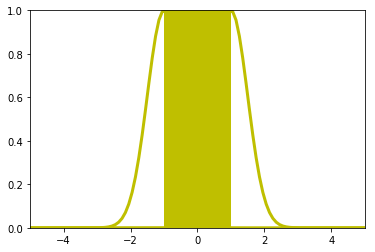

In [8]:
from matplotlib.patches import Rectangle

someX, someY = 0.0, 0.5
fig,ax = plt.subplots()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX - 1, someY - 0.5), 2, 1.0,
                      alpha=1, facecolor='y', edgecolor='none'))
hsi.x0=1.0  # current value
hsi.sigma=0.5 # standard deviation
x=np.linspace(-50,50,1000)
ymax=1/(hsi.sigma * np.sqrt(2 * np.pi))
y=1/(hsi.sigma * np.sqrt(2 * np.pi)) * np.exp( - (x-1)**2 / (2 * hsi.sigma*hsi.sigma))
plt.plot(x, y/ymax, linewidth=3, color='y')
y=1/(hsi.sigma * np.sqrt(2 * np.pi)) * np.exp( - (x+1)**2 / (2 * hsi.sigma*hsi.sigma))
plt.plot(x, y/ymax, linewidth=3, color='y')

plt.xlim(-5,5);plt.ylim(0,1);

Now the above example compares a number to a benchmarking number. There are cases when we need to compare a set of number with a number. For example, we want to calculate number of trees above certain height within one hectare. To do that we use 'gscore_range' functions. This function calls 'gscore'. It operates with matrices (sets of numbers) in oppose to a number. We pass a matrix, the set of numbers represent tree heights within an area of interest (say 3x3 grid cells). In example below I set allowed tree height to be within the range between 2m and 6m, where the number of allowed trees within that range should be 6. Here 6 is a benchmarking number. 

In [9]:
mat = np.matrix('1 2 3 ; 3 4 5; 6 7 8')
hsi.lb=2 # tree lower boundary height
hsi.ub=6 # tree upper boundary height
hsi.smooth=0 # default gaussian with variance =2
hsi.bench=6 # number of trees within matrix (mat) with tree heights in [lb,ub]
print 'benchmarking number of trees is',hsi.bench

x1=np.asarray(mat).reshape(-1)
xx=x1[hsi.lb<=x1]
num=len(xx[xx<=hsi.ub])

print 'number of trees between 2m and 6m is',num
gscore=hsi.gscore_range(mat)
print 'gscore range [2,6]:',round(gscore,3)

hsi.ub=5 # changing upper bound
xx=x1[hsi.lb<=x1]
hsi.number=len(xx[xx<=hsi.ub])
print 'number of trees between 2m and 5m is ',hsi.number
gscore=hsi.gscore_range(mat)
print 'gscore range [2,5]:',round(gscore,3)

benchmarking number of trees is 6
number of trees between 2m and 6m is 6
gscore range [2,6]: 1.0
number of trees between 2m and 5m is  5
gscore range [2,5]: 0.607


3.In this study we compare number of species with benchamrking number within the certaint area. To get a more robust score it makes sense to partition the area to a smaller segments and then calculate scores for each segment. The 'subset_matrix' patitions the bigger matrix to smaller subsets. Lets test how 'subset_matrix' works. This example comes from hvi_unit_test.py 

In [10]:
a = np.matrix('1 2 3 ; 3 4 5; 6 7 8')
b = np.matrix(' 2 3 ;  4 5')
hsi.nsize = 2
hsi.msize = 2
# 0 and 1 are indexes in the matrix
c = hsi.subset_matrix(a, 0, 1)
print 'input matrix:'
print a
print 'here is what we should get:'
print b
print 'answer:'
print c

input matrix:
[[1 2 3]
 [3 4 5]
 [6 7 8]]
here is what we should get:
[[2 3]
 [4 5]]
answer:
[[2 3]
 [4 5]]


The function 'score_subset' uses 'subset_matrix' to patition bigger matrix to the equal sets. For example below we create a 4x4 matrix of ones and the cumulatively add elements. Then we paas this matrix to 'score_subset' functions. 

The 'score_subset' function calculates score for the subsets of the matrix (mat). Upper and lower bounnds defines the constrains. We count number of elements correspoding to this constrain and then compare it with the benchmarking number. Similarly to 'gscore_range' function. The only difference that here we can define the subset size that matrix 'mat' is going to be partioned to. For example, we partition (mat) to 2x2 subsets, so we will have 4 2x2 subsets. Score is going to be calculated for each subset and the final score is an average of each score. Here we have average of 4 scores.  

In [11]:
n=4 # matrix rank
x = np.ones([n,n])
x1= np.cumsum(x)
mat=np.reshape(x1, (n, n)) 
print mat

hsi.lb=1 # lower boundary 
hsi.ub=6 # upper boundary 
hsi.smooth=0 # score smoothing
hsi.bench=3 # number of trees within matrix (mat) with tree heights in [lb,ub]
hsi.nsize = 2
hsi.msize = 2

score = hsi.score_subset(mat)#, lb, ub, bench_number, nx, ny, smooth=s)
print 'subset_score:',round(score,2)

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]
 [ 13.  14.  15.  16.]]
subset_score: 0.31


Note, that 'nsize' and 'msize' can be skiped, then by default 'score_subset' assigns 5x5 size subsets. Since in LLM model we use 25x25 matrix this is not a problem. Here subset size has to specified explicitely. Example below uses full 4x4 matrix. The score decrease because total number of elements between 1 and 6 is 6 which is greater than 3. 

In [12]:
nx=4
ny=4
hsi.nsize = 4
hsi.msize = 4
score= hsi.score_subset(mat)#, lb, ub, bench_number, nx, ny, smooth=s)
print 'subset_score(3):',round(score,2)
hsi.bench=6
score= hsi.score_subset(mat)#, lb, ub, 6, nx, ny, smooth=s)
print 'subset_score(6):',round(score,2)

subset_score(3): 0.01
subset_score(6): 1.0
